In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Mutual Information

In [19]:
am  =pd.read_csv('C:/Users/Nikhil/AppData/Local/Temp/Temp1_ames.csv.zip/ames.csv')

In [20]:
am

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YearSold,SaleType,SaleCondition,SalePrice
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,None,0.0,5,2010,WD,Normal,215000
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,None,0.0,6,2010,WD,Normal,105000
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,Gar2,12500.0,6,2010,WD,Normal,172000
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,0.0,No_Pool,No_Fence,None,0.0,4,2010,WD,Normal,244000
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,None,0.0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Split_or_Multilevel,Residential_Low_Density,37.0,7937.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,CulDSac,...,0.0,No_Pool,Good_Privacy,None,0.0,3,2006,WD,Normal,142500
2926,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0.0,8885.0,Pave,No_Alley_Access,Slightly_Irregular,Low,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,None,0.0,6,2006,WD,Normal,131000
2927,Split_Foyer,Residential_Low_Density,62.0,10441.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,Minimum_Privacy,Shed,700.0,7,2006,WD,Normal,132000
2928,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,77.0,10010.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,0.0,No_Pool,No_Fence,None,0.0,4,2006,WD,Normal,170000


In [44]:
x = am.copy()

In [45]:
y = x.pop('SalePrice')

In [46]:
for i in am.select_dtypes('object'):
    x[i], _ = x[i].factorize()

In [47]:
discrete_features = x.dtypes=='int64'

In [48]:
discrete_features

MSSubClass        True
MSZoning          True
LotFrontage      False
LotArea          False
Street            True
                 ...  
MiscVal          False
MoSold            True
YearSold          True
SaleType          True
SaleCondition     True
Length: 78, dtype: bool

In [2]:
from sklearn.feature_selection import mutual_info_regression

In [50]:
def mi_score(x,y,discrete_features):
    mi_score = mutual_info_regression(x,y,discrete_features=discrete_features)
    mi_score = pd.Series(mi_score,name='mi_score',index=x.columns)
    mi_score = mi_score.sort_values(ascending=False)
    return mi_score

In [51]:
mi_score = mi_score(x,y,discrete_features)

In [59]:
mi_score.head(10)

OverallQual     0.588205
Neighborhood    0.569992
GrLivArea       0.495892
YearBuilt       0.439156
GarageArea      0.416230
TotalBsmtSF     0.391077
GarageCars      0.385044
FirstFlrSF      0.369420
BsmtQual        0.367818
ExterQual       0.329000
Name: mi_score, dtype: float64

In [56]:
def plot_mi_score(score):
    score = score.sort_values(ascending=True)
    width = np.arange(len(score))
    ticks = list(score.index)
    plt.barh(width,score)
    plt.yticks(width,ticks)
    plt.title('Mutual Information Scores')

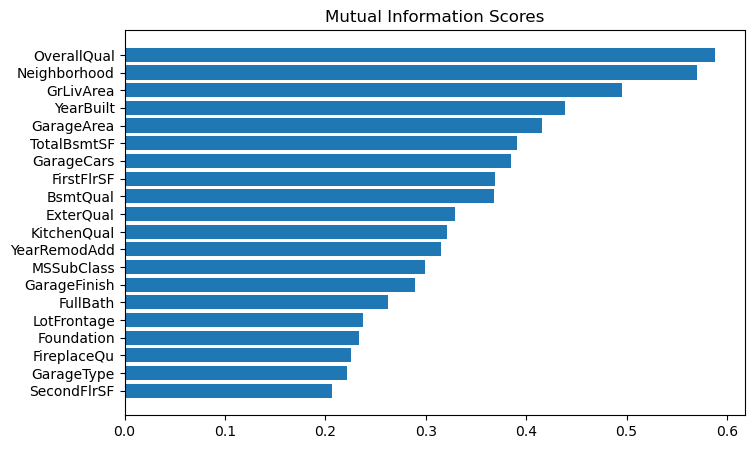

In [61]:
plt.figure(dpi=100, figsize=(8,5))
plot_mi_score(mi_score.head(20))

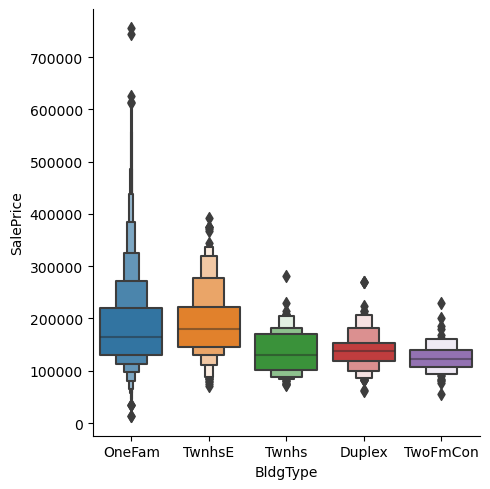

In [63]:
sns.catplot(x='BldgType',y='SalePrice',data=am,kind='boxen')

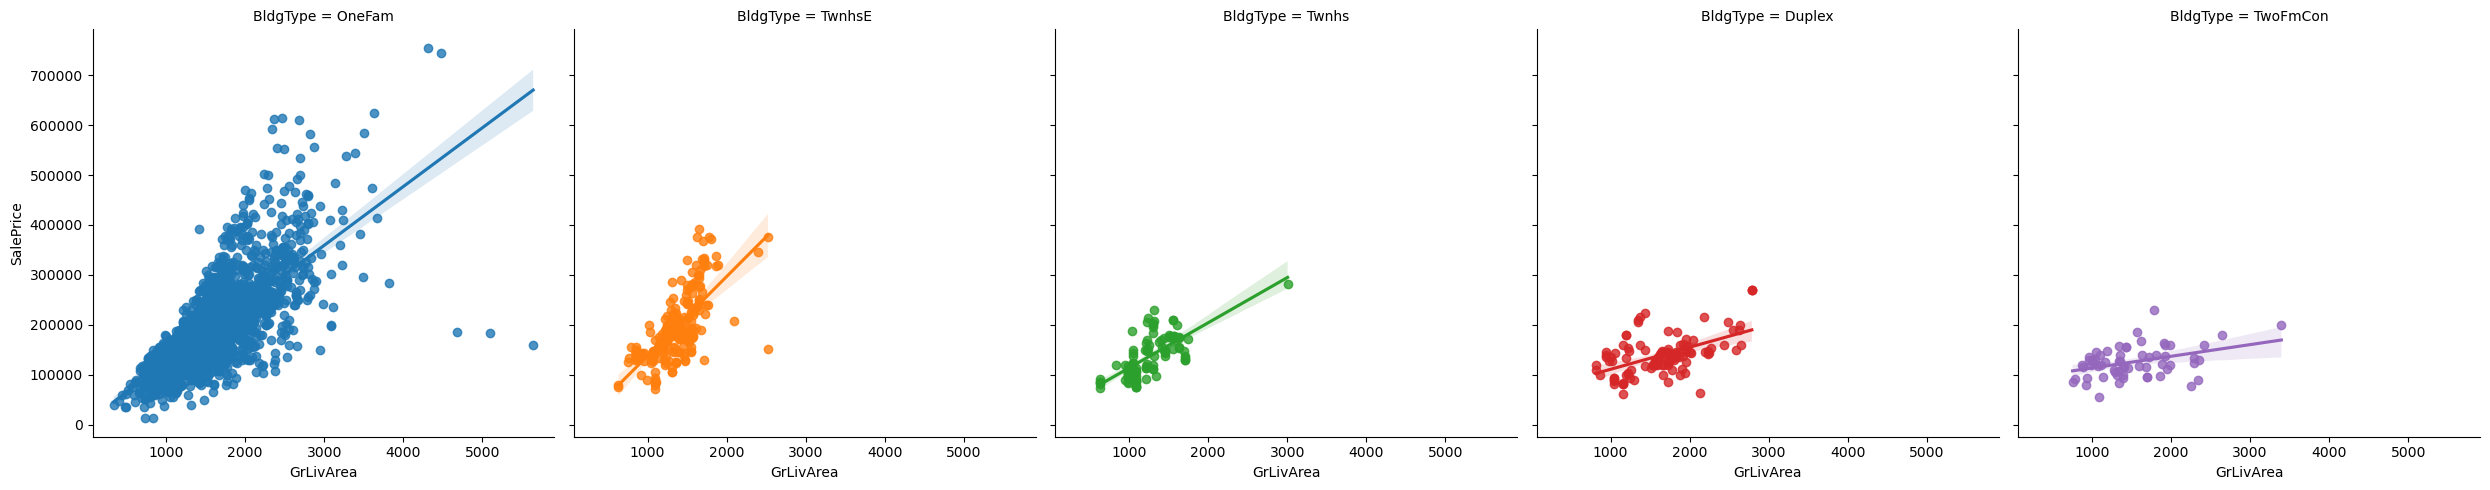

In [67]:
sns.lmplot(x='GrLivArea',y='SalePrice',hue='BldgType',data=am,col='BldgType')

# Create Features

In [69]:
X_1 = pd.DataFrame()

In [70]:
X_1["LivLotRatio"] = am['GrLivArea'] / am['LotArea']
X_1["Spaciousness"] = am['FirstFlrSF'] + am['SecondFlrSF'] + am['TotRmsAbvGrd']
X_1["TotalOutsideSF"] = am['WoodDeckSF'] + am['OpenPorchSF'] + am['EnclosedPorch'] + am['Threeseasonporch'] + am['ScreenPorch']

In [71]:
X_2 = pd.get_dummies(am['BldgType'],prefix='Bldg')

In [73]:
X_3 = X_2.mul(am['GrLivArea'],axis=0)

In [75]:
X_4 = am.join(X_3)

In [76]:
X_4

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YearSold,SaleType,SaleCondition,SalePrice,Bldg_Duplex,Bldg_OneFam,Bldg_Twnhs,Bldg_TwnhsE,Bldg_TwoFmCon
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141.0,31770.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,5,2010,WD,Normal,215000,0.0,1656.0,0.0,0.0,0.0
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80.0,11622.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,6,2010,WD,Normal,105000,0.0,896.0,0.0,0.0,0.0
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81.0,14267.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,6,2010,WD,Normal,172000,0.0,1329.0,0.0,0.0,0.0
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93.0,11160.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,4,2010,WD,Normal,244000,0.0,2110.0,0.0,0.0,0.0
4,Two_Story_1946_and_Newer,Residential_Low_Density,74.0,13830.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,3,2010,WD,Normal,189900,0.0,1629.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Split_or_Multilevel,Residential_Low_Density,37.0,7937.0,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,CulDSac,...,3,2006,WD,Normal,142500,0.0,1003.0,0.0,0.0,0.0
2926,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0.0,8885.0,Pave,No_Alley_Access,Slightly_Irregular,Low,AllPub,Inside,...,6,2006,WD,Normal,131000,0.0,902.0,0.0,0.0,0.0
2927,Split_Foyer,Residential_Low_Density,62.0,10441.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,7,2006,WD,Normal,132000,0.0,970.0,0.0,0.0,0.0
2928,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,77.0,10010.0,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,4,2006,WD,Normal,170000,0.0,1389.0,0.0,0.0,0.0


In [88]:
X_3 = pd.DataFrame()

In [107]:
# Create Counts
X_3["PorchTypes"] = am[am['WoodDeckSF']>0]['WoodDeckSF']
X_3

,PorchTypes,PorchTypes1
0,210.0,1630
1,140.0,1630
2,393.0,1630
4,212.0,1630
5,360.0,1630
...,...,...
2925,120.0,1630
2926,164.0,1630
2927,80.0,1630
2928,240.0,1630


In [108]:
X_3['PorchTypes1'] = am[am['OpenPorchSF']>0]['OpenPorchSF']
X_3

,PorchTypes,PorchTypes1
0,210.0,62.0
1,140.0,NaN
2,393.0,36.0
4,212.0,34.0
5,360.0,36.0
...,...,...
2925,120.0,NaN
2926,164.0,NaN
2927,80.0,32.0
2928,240.0,38.0


In [97]:
# Create a group feature
X_5 = pd.DataFrame()

In [102]:
X_5["MedNhbdArea"] = am.groupby('Neighborhood')['GrLivArea'].median()
X_5

,MedNhbdArea
Neighborhood,
Bloomington_Heights,1455.5
Blueste,1118.0
Briardale,1092.0
Brookside,1231.0
Clear_Creek,1694.0
College_Creek,1504.0
Crawford,1648.0
Edwards,1195.5
Gilbert,1560.0


# Clustering

In [116]:
from sklearn.cluster import KMeans
# YOUR CODE HERE: Define a list of the features to be used for the clustering
features = 'LotArea', 'TotalBsmtSF', 'FirstFlrSF', 'SecondFlrSF','GrLivArea'


# Standardize
x_scaled = x.loc[:, features]
x_scaled = (x_scaled - x_scaled.mean(axis=0)) / x_scaled.std(axis=0)


# YOUR CODE HERE: Fit the KMeans model to X_scaled and create the cluster labels
kmeans = KMeans(n_clusters=10,max_iter=10,random_state=0)
x["Cluster"] = kmeans.fit_predict(x_scaled)

In [117]:
x['Cluster']

0       9
1       5
2       0
3       6
4       3
       ..
2925    5
2926    5
2927    5
2928    0
2929    3
Name: Cluster, Length: 2930, dtype: int32

In [119]:
kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)


# YOUR CODE HERE: Create the cluster-distance features using `fit_transform`
X_cd = kmeans.fit_transform(x_scaled)


# Label features and join to dataset
X_cd = pd.DataFrame(X_cd, columns=[f"Centroid_{i}" for i in range(X_cd.shape[1])])
X = x.join(X_cd)


# Principal Component Analysis

In [25]:
from sklearn.decomposition import PCA

In [4]:
features = [ "GarageArea",
    "YearRemodAdd",
    "TotalBsmtSF",
    "GrLivArea",]

In [10]:
print(am[features].corrwith(am['SalePrice']))

GarageArea      0.640138
YearRemodAdd    0.532974
TotalBsmtSF     0.632529
GrLivArea       0.706780
dtype: float64


In [15]:
X = am.copy()
X = X.loc[:,features]

In [13]:
Y = X.pop('SalePrice')

In [20]:
X_scaled = (X - X.mean(axis=0))/(X.std(axis=0))

In [21]:
X_scaled

,GarageArea,YearRemodAdd,TotalBsmtSF,GrLivArea
0,0.257179,-1.163290,0.065185,0.309212
1,1.195897,-1.115352,-0.383827,-1.194223
2,-0.746598,-1.259166,0.629852,-0.337661
3,0.229296,-0.779786,2.400955,1.207317
4,0.043412,0.658354,-0.279511,0.255801
...,...,...,...,...
2925,0.536006,-0.012778,-0.109431,-0.982555
2926,0.052706,-0.060716,-0.424647,-1.182354
2927,-2.196499,0.370726,-0.315795,-1.047836
2928,-0.254004,-0.444220,0.765916,-0.218968


In [26]:
pca = PCA()

In [31]:
X_pca = pca.fit_transform(X_scaled)

In [55]:
pca.components_

array([[ 0.54122942,  0.42707725,  0.5100756 ,  0.51429428],
       [ 0.10237467, -0.88661165,  0.36077798,  0.27069995],
       [-0.03846963, -0.04906151, -0.66683607,  0.74259189],
       [ 0.83373271, -0.17063932, -0.4061918 , -0.33283662]])

In [35]:
X_pca.shape[1]

4

In [46]:
component_name = []
for i in range(X_pca.shape[1]):
    component_name.append(f''PC{i+1})

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1997401619.py, line 3)

In [38]:
component_name

['PCi', 'PCi', 'PCi', 'PCi']

In [47]:
def apply_pca(X, standardize=True):
    # Standardize
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Create principal components
    pca = PCA()
    X_pca = pca.fit_transform(X)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=X.columns,  # and the rows are the original features
    )
    return pca, X_pca, loadings

In [59]:
apply_pca(X)
print(loadings)

                   PC1       PC2       PC3       PC4
GarageArea    0.541229  0.102375 -0.038470  0.833733
YearRemodAdd  0.427077 -0.886612 -0.049062 -0.170639
TotalBsmtSF   0.510076  0.360778 -0.666836 -0.406192
GrLivArea     0.514294  0.270700  0.742592 -0.332837


In [64]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axes

NameError: name 'axes' is not defined

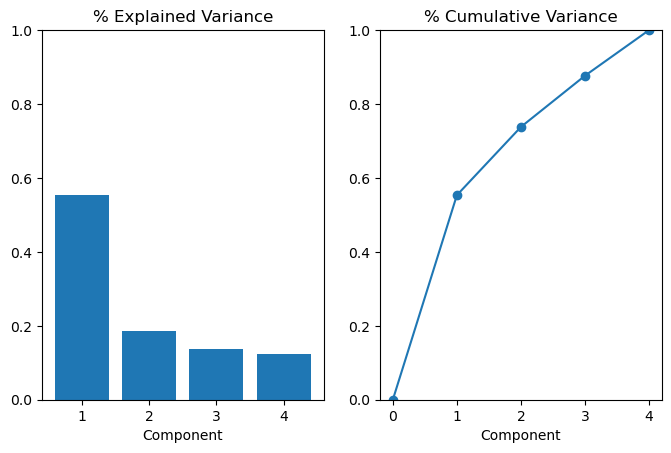

In [62]:
plot_variance(pca)
plt.grid()

In [75]:
idx = X_pca['PC3'].sort_values(ascending=False).index

In [76]:
idx

Int64Index([1497,  290, 1537, 2666, 2230, 2337, 1945,  812,  909, 2176,
            ...
             959,   46, 2308,  104, 1392, 1656, 1637, 1498,  423,  444],
           dtype='int64', length=2930)

In [12]:
am.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'FirstFlrSF', 'SecondFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF',

In [72]:
Cols = ['GarageArea','GrLivArea','LotShape','Street']

In [77]:
am.loc[idx,Cols]

,GarageArea,GrLivArea,LotShape,Street
1497,624.0,3820.0,Slightly_Irregular,Pave
290,0.0,2650.0,Regular,Pave
1537,1014.0,3447.0,Slightly_Irregular,Pave
2666,840.0,3608.0,Moderately_Irregular,Pave
2230,691.0,2726.0,Slightly_Irregular,Pave
...,...,...,...,...
1656,944.0,1220.0,Slightly_Irregular,Pave
1637,1110.0,2338.0,Slightly_Irregular,Pave
1498,1418.0,5642.0,Irregular,Pave
423,672.0,2402.0,Regular,Pave


,GarageArea,YearRemodAdd,TotalBsmtSF,GrLivArea
0,528.0,1960,1080.0,1656.0
1,730.0,1961,882.0,896.0
2,312.0,1958,1329.0,1329.0
3,522.0,1968,2110.0,2110.0
4,482.0,1998,928.0,1629.0
...,...,...,...,...
2925,588.0,1984,1003.0,1003.0
2926,484.0,1983,864.0,902.0
2927,0.0,1992,912.0,970.0
2928,418.0,1975,1389.0,1389.0


# Taarget Encoding

In [7]:
am.select_dtypes('object').nunique()

MSSubClass       16
MSZoning          7
Street            2
Alley             3
LotShape          4
LandContour       4
Utilities         3
LotConfig         5
LandSlope         3
Neighborhood     28
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
OverallQual      10
OverallCond       9
RoofStyle         6
RoofMatl          8
Exterior1st      16
Exterior2nd      17
MasVnrType        5
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          6
BsmtCond          6
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        6
KitchenQual       5
Functional        8
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
PoolQC            5
Fence             5
MiscFeature       6
SaleType         10
SaleCondition     6
dtype: int64

In [15]:
x_encode = am.sample(frac = 0.2, random_state=0)
y_encode = x_encode.pop('SalePrice')

In [21]:
x_pretrain = am.drop(x_encode.index)
y_pretrain = x_pretrain.pop('SalePrice')

In [23]:
pip install category_encoders

     --------------------------------------- 81.2/81.2 kB 68.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [24]:
from category_encoders import MEstimateEncoder

In [25]:
encoder = MEstimateEncoder(cols = ['Neighborhood'],m=5)

In [27]:
encoder.fit(x_encode,y_encode)

MEstimateEncoder(cols=['Neighborhood'], m=5)

In [28]:
x_train = encoder.transform(x_pretrain,y_pretrain)

In [33]:
encoder.cols

['Neighborhood']

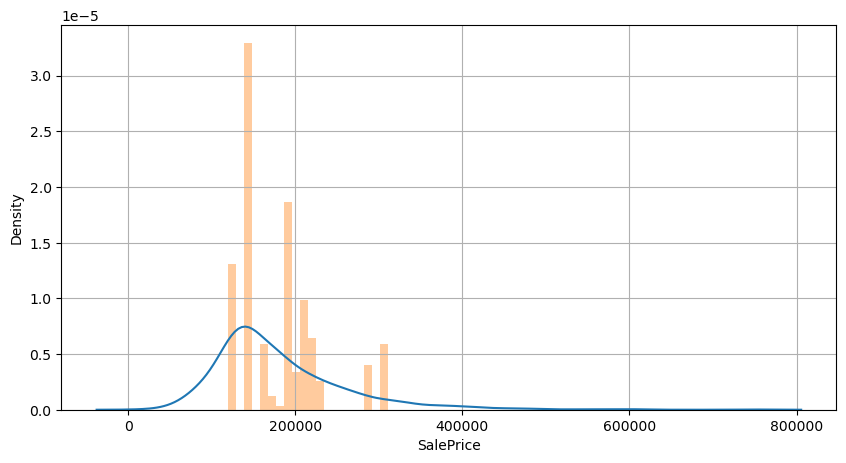

In [43]:
plt.figure(figsize=(10,5))
sns.distplot(y_pretrain, kde=True,hist=False)
sns.distplot(x_train[['Neighborhood']],kde=False,norm_hist=True)
plt.grid()
plt.show()

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
model = RandomForestRegressor()

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
x = am.copy()
y = x.pop('SalePrice')

In [60]:
def score_dataset(X, y, model):
    # Label encoding for categoricals
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

In [62]:
score_dataset(x,y,RandomForestRegressor())

0.14410948655508934

In [65]:
score_dataset(x_train,y_pretrain,RandomForestRegressor())

0.14438192429255747